In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 14.4 MB/s eta 0:00:00


In [ ]:
import shap
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
x_train = pd.read_csv('/content/x_train.csv')
y_train = pd.read_csv('/content/y_train.csv')
x_test = pd.read_csv('/content/x_test.csv')
y_test = pd.read_csv('/content/y_test.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, penalty= 'none', solver= 'newton-cg')
LR.fit(x_train, y_train)
LR_pred = LR.predict(x_test)
LR_acc = accuracy_score(y_test, LR_pred)
LR_acc

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
Setting penalty=None will ignore the C and l1_ratio parameters
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


1.0

In [ ]:
LR_explainer = shap.Explainer(LR,x_train )
LR_shap_values = LR_explainer.shap_values(x_train)
LR_shap_values

[array([[-9.79898457e+00,  1.19897303e+00, -4.97326270e+00,
          3.46425043e-01],
        [ 5.63261487e+01,  2.80238467e+01, -9.86177706e+01,
         -4.20395340e+00],
        [ 1.60738223e+01,  4.29092855e+00, -2.16975808e+01,
         -1.24136816e+00],
        [-3.82971562e-01,  6.11193176e+00,  2.74512719e+01,
          2.05347485e-01],
        [ 1.70107788e+00, -8.31857176e+00, -9.56500489e+00,
          1.78780206e-01],
        [ 3.47912722e+01,  1.36965520e+01, -6.35104420e+01,
         -2.47614556e+00],
        [ 5.79437637e+01,  4.78287574e+01, -6.14474708e+01,
         -4.50027179e+00],
        [ 3.33040420e+01,  3.22827968e+01, -7.72269226e+01,
         -3.21771940e+00],
        [-4.82828350e+01, -4.15731977e+01,  7.19214920e+01,
          4.18913973e+00],
        [-7.16027490e+01, -4.33709206e+01,  9.86284689e+01,
          5.45691408e+00],
        [ 2.67662817e+01,  2.75680794e+01, -6.62676666e+01,
         -2.67711881e+00],
        [-2.03947846e+01, -6.44220664e+00, 

Text(0.5, 3.8222222222222175, 'mean(|SHAP Value|')

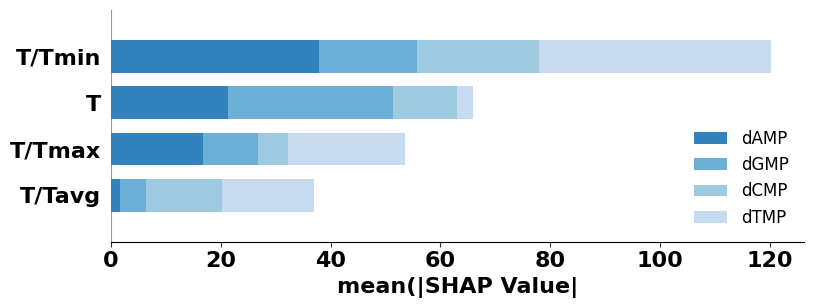

In [ ]:
shap.summary_plot(LR_shap_values, x_train, plot_type="bar", feature_names =['T','T/Tmax','T/Tmin', 'T/Tavg'], class_names=['dAMP', 'dGMP', 'dCMP', 'dTMP'], class_inds='original', color=plt.get_cmap("tab20c"),show = False )
plt.xticks(fontsize=16, fontweight='bold', color='black')
plt.yticks(fontsize=16, fontweight='bold', color='black')
plt.xlabel("mean(|SHAP Value|",fontsize=16, fontweight='bold')

In [24]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion = 'entropy', random_state=95, max_depth = 32)
RFC.fit(x_train, y_train)
RFC_pred = RFC.predict(x_test)
RFC_acc= accuracy_score(y_test, RFC_pred)
RFC_acc

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8983050847457628

In [25]:
RFC_explainer = shap.TreeExplainer(RFC)
RFC_shap_values = RFC_explainer.shap_values(x_train)
RFC_shap_values

[array([[-3.34496819e-02, -9.46349535e-02, -1.12677349e-01,
          1.57743487e-03],
        [ 2.88894202e-02,  1.18088807e-01, -3.53895523e-01,
         -3.22672527e-02],
        [-2.44597592e-03, -1.10668842e-01, -1.14734085e-01,
         -1.13356472e-02],
        [ 6.75304751e-02,  2.60431524e-01,  3.60261364e-01,
          7.25920870e-02],
        [-1.79578110e-02, -1.66985709e-01, -4.63484319e-02,
         -7.89259716e-03],
        [ 2.67326592e-03,  1.46251923e-02, -2.41706572e-01,
         -1.47764351e-02],
        [ 1.54594915e-01,  3.19538072e-01, -9.60411677e-02,
          7.27236313e-02],
        [ 2.65377641e-03,  1.36466108e-01, -3.26454921e-01,
         -5.18495132e-02],
        [-3.39772011e-02, -3.01381864e-01,  1.14620726e-01,
          1.15537897e-02],
        [-6.13699364e-02, -2.90095124e-01,  1.86550031e-01,
          2.57304801e-02],
        [ 3.54173422e-03,  1.41575499e-01, -3.31172872e-01,
         -2.31289106e-02],
        [-3.60563488e-02, -1.74372043e-01, 

Text(0.5, 3.8222222222222175, 'mean(|SHAP Value|')

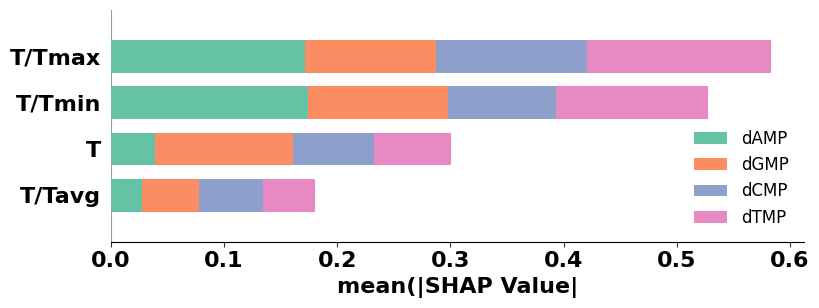

In [26]:
shap.summary_plot(RFC_shap_values, x_train, plot_type="bar", feature_names =['T','T/Tmax','T/Tmin', 'T/Tavg'], class_names=['dAMP', 'dGMP', 'dCMP', 'dTMP'], class_inds='original', color=plt.get_cmap("Set2"),show = False )
plt.xticks(fontsize=16, fontweight='bold', color='black')
plt.yticks(fontsize=16, fontweight='bold', color='black')
plt.xlabel("mean(|SHAP Value|",fontsize=16, fontweight='bold')

In [14]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini', max_depth=45, random_state=35)
DTC.fit(x_train, y_train)
DTC_pred = DTC.predict(x_test)
DTC_acc= accuracy_score(y_test, DTC_pred)
DTC_acc

0.864406779661017

In [17]:
DTC_explainer = shap.TreeExplainer(DTC)
DTC_shap_values = DTC_explainer.shap_values(x_train)
DTC_shap_values

[array([[-0.02393679, -0.27947443,  0.05267646,  0.01039141],
        [ 0.03191057,  0.18415031, -0.44233055, -0.01407368],
        [-0.04533262, -0.08817984, -0.07423089, -0.03259999],
        [-0.02215665,  0.30008544,  0.51467771, -0.03294985],
        [-0.02215665, -0.29676353,  0.11117683, -0.03259999],
        [-0.01897369,  0.02409975, -0.23139572, -0.01407368],
        [ 0.30702775,  0.43658313,  0.03011944, -0.01407368],
        [-0.10696097,  0.20712257, -0.32643126, -0.01407368],
        [-0.00611654, -0.46789084,  0.22774322,  0.0059208 ],
        [-0.02340247, -0.47193158,  0.24285177,  0.01213893],
        [-0.10696097,  0.20712257, -0.32643126, -0.01407368],
        [-0.02393679, -0.27947443,  0.05267646,  0.01039141],
        [ 0.00672588, -0.04676721, -0.18622834, -0.01407368],
        [-0.04533262,  0.0275453 , -0.20848236, -0.01407368],
        [ 0.00614001, -0.29029346,  0.01778902,  0.02602109],
        [-0.04533262, -0.08817984, -0.07423089, -0.03259999],
        

Text(0.5, 3.8222222222222175, 'mean(|SHAP Value|')

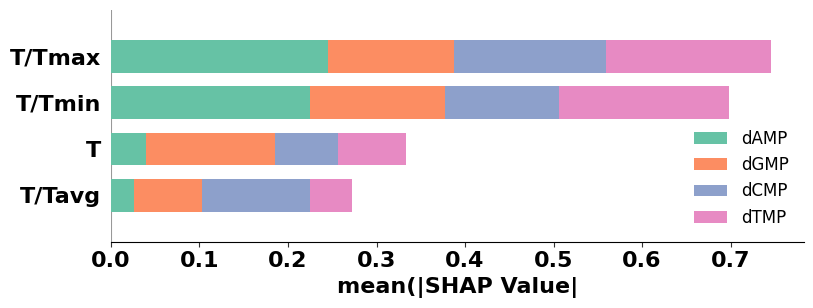

In [22]:
shap.summary_plot(DTC_shap_values, x_train, plot_type="bar", feature_names =['T','T/Tmax','T/Tmin', 'T/Tavg'], class_names=['dAMP', 'dGMP', 'dCMP', 'dTMP'], class_inds='original', color=plt.get_cmap("Set2"),show = False )
plt.xticks(fontsize=16, fontweight='bold', color='black')
plt.yticks(fontsize=16, fontweight='bold', color='black')
plt.xlabel("mean(|SHAP Value|",fontsize=16, fontweight='bold')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)
KNN_acc= accuracy_score(y_test, KNN_pred)
KNN_acc

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7966101694915254

In [10]:
KNN_explainer = shap.KernelExplainer(KNN.predict_proba,x_train)
KNC_shap_values = KNN_explainer.shap_values(x_train)
KNC_shap_values

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


  0%|          | 0/233 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

[array([[-1.88841202e-01,  2.86123033e-03, -4.57796853e-02,
         -8.58369099e-03],
        [-1.34477825e-01, -3.57653791e-03, -9.79971388e-02,
         -4.29184549e-03],
        [-1.54148784e-01, -2.53934192e-02, -6.25894134e-02,
          1.78826896e-03],
        [ 2.44635193e-01,  1.71673820e-02,  4.89985694e-01,
          7.86838340e-03],
        [-5.90128755e-02, -1.18025751e-02, -1.74177396e-01,
          4.64949928e-03],
        [-1.28397711e-01, -1.18025751e-02, -9.97854077e-02,
         -3.57653791e-04],
        [ 8.45851216e-01,  2.50357654e-03, -8.61945637e-02,
         -2.50357654e-03],
        [ 2.41416309e-01,  1.18025751e-02, -4.88912732e-01,
         -4.64949928e-03],
        [-4.07725322e-01, -1.28755365e-02,  1.67381974e-01,
          1.28755365e-02],
        [-4.23104435e-01, -1.10872675e-02,  1.80615165e-01,
          1.32331903e-02],
        [ 1.85622318e-01,  1.39484979e-02, -4.35264664e-01,
         -4.64949928e-03],
        [-2.43562232e-01, -3.11158798e-02, 

Text(0.5, 3.8222222222222175, 'mean(|SHAP Value|')

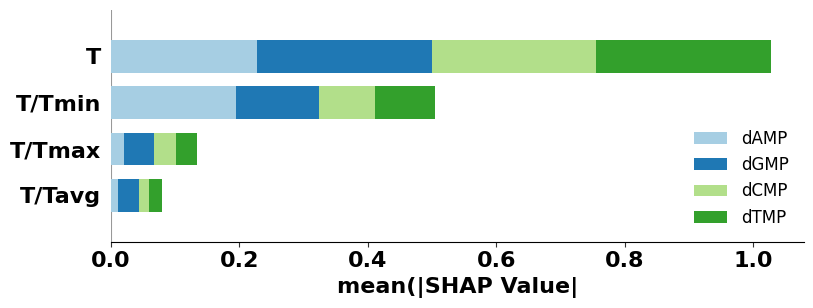

In [13]:
shap.summary_plot(KNC_shap_values, x_train, plot_type="bar", feature_names =['T','T/Tmax','T/Tmin', 'T/Tavg'], class_names=['dAMP', 'dGMP', 'dCMP', 'dTMP'], class_inds='original',color=plt.get_cmap("Paired"), show = False )
plt.xticks(fontsize=16, fontweight='bold', color='black')
plt.yticks(fontsize=16, fontweight='bold', color='black')
plt.xlabel("mean(|SHAP Value|",fontsize=16, fontweight='bold')